#### Goal:

Work on the part of the code that listens to the microphone, takes in a 5 second chunk, processes it for the model, pushes it through the model, and gets the prediction out.

In [1]:
import keras
from pydub import AudioSegment
from mb_utils import *

from datetime import datetime

import pyaudio
import wave

Using TensorFlow backend.
/anaconda/lib/python3.6/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
%matplotlib inline

In [3]:
from importlib import reload
import mb_utils

In [21]:
reload(mb_utils)
from mb_utils import *

### initialization: load trained model

In [5]:
model = keras.models.load_model('trained_models/950111.h5')

### set up to listen to audio

In [6]:
p = pyaudio.PyAudio()
for ii in range(p.get_device_count()):
    print(p.get_device_info_by_index(ii).get('name'))

Built-in Microphone
Built-in Output


In [7]:
# choose the 'Built-in Microphone'
dev_index = 0

In [8]:
# audio settings
form_1 = pyaudio.paInt16 # 16-bit resolution
chans = 1 # 1 channel
samp_rate = 44100 # 44.1kHz sampling rate
chunk = 4096 # 2^12 samples for buffer
record_secs = 5 # seconds to record
dev_index = dev_index # device index found by p.get_device_info_by_index(ii)
#wav_output_filename = 'test1.wav' # name of .wav file

### listen and predict 

Recording...
Clip start: 11/16/2019 16:51:03...   prediction: empty.   [0.9800, 0.0200, 0.0000]
Clip start: 11/16/2019 16:51:08...   prediction: empty.   [0.9799, 0.0201, 0.0000]
Clip start: 11/16/2019 16:51:13...   prediction: empty.   [0.9413, 0.0587, 0.0000]
Clip start: 11/16/2019 16:51:18...   prediction: empty.   [0.9484, 0.0516, 0.0000]
Clip start: 11/16/2019 16:51:23...   prediction: empty.   [0.9585, 0.0415, 0.0000]
Clip start: 11/16/2019 16:51:28...   prediction: empty.   [0.9635, 0.0365, 0.0000]
Clip start: 11/16/2019 16:51:33...   prediction: empty.   [0.9800, 0.0200, 0.0000]
Clip start: 11/16/2019 16:51:38...   prediction: empty.   [0.9658, 0.0342, 0.0000]
Clip start: 11/16/2019 16:51:42...   prediction: empty.   [0.9692, 0.0308, 0.0000]
Clip start: 11/16/2019 16:51:47...   prediction: empty.   [0.9720, 0.0280, 0.0000]
stream closed.


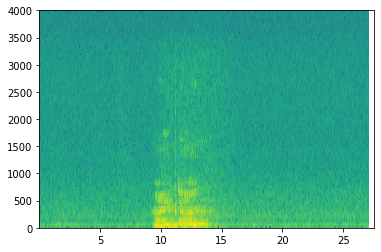

In [22]:
# create pyaudio instantiation
audio = pyaudio.PyAudio() 

# create pyaudio stream
stream = audio.open(format = form_1,rate = samp_rate,channels = chans, \
                    input_device_index = dev_index,input = True, \
                    frames_per_buffer=chunk)


# process five seconds at a time and return predictions
print('Recording...')
for i in range(10):
    pred = record_and_process_5_seconds(i, samp_rate, chunk, record_secs, stream,chans, 
                                        form_1, audio, model)


# stop the stream, close it, and terminate the pyaudio instantiation
stream.stop_stream()
stream.close()
print('stream closed.')
audio.terminate()

In [23]:
import IPython

In [24]:
IPython.display.Audio('runtime_temp.wav')

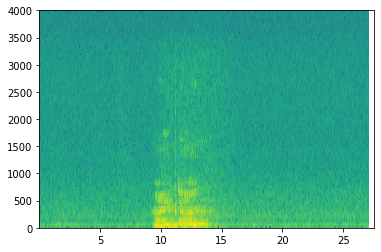

In [25]:
x = graph_spectrogram('runtime_temp.wav')

In [12]:
x.shape

(101, 2754)

In [13]:
x

array([[7.34719113e+01, 4.63224519e+00, 6.23021348e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.73433577e+03, 1.87273228e+03, 1.20896477e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.24882306e+03, 2.60067893e+03, 2.03300371e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.61759974e-04, 8.26197216e-05, 2.16826070e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.38271650e-05, 1.23855783e-04, 7.36566879e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.37202527e-06, 6.00418324e-05, 1.03838048e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### practice runtime: listen to microphone and get a 5-second audio chunk, then predict on it

'not_enough'

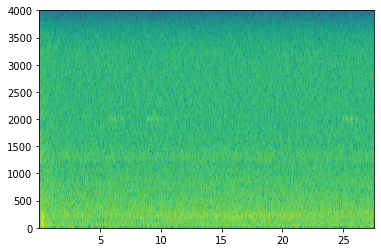

In [7]:
# for now, read in a sample WAV file
filename = 'runtime_temp.wav'

# clean up to make sure it is in correct format. saves it to runtime_temp.wav.
preprocess_runtime_clip(filename)

# feed current clip to model and get prediction
pred = run_model_on_clip(model, 'runtime_temp.wav')
pred